La vida media representa el promedio de vida de una particula antes de desintegrarse, la cual se puede modelar matematicamente con una ecuación diferencial, deonde la cantidad de particulas $\Delta N$ que se desintegran intervalo de tiempo $ Delta t$ es directamente proporcional al número de particulas presentes, x, y al intervalo $\Delta t$. Es decir: $\Delta x$ $\propto $ $x \Delta t$ donde la razón de desintegración de las particulas se proporcial a la cantidad de particulas

Una solución de esta ecuación es de la forma $N(t) = N_o e^{-\lambda t}$, el signo menos representa el decrimento de la cantida de particulas; Tomando los datos del archivo data.dat, de la desintegracion de una cierta cantidad de particulas del mismo tipo, para encontrar el tiempo medio en la cual es muy probable que la particula se desintegre.

In [1]:
import numpy
from matplotlib import pyplot as plt
from Mincuad import Minimoscuadrados
from scipy import linspace
from sklearn import linear_model

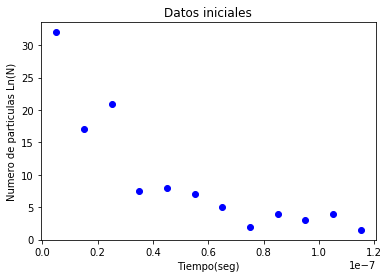

In [2]:
Dat = numpy.loadtxt("data.dat")
plt.plot(1e-9*Dat[:,0],Dat[:,1],'bo')
plt.title('Datos iniciales')
plt.ylabel('Numero de particulas Ln(N)')
plt.xlabel('Tiempo(seg)')
D = numpy.copy(Dat)
D[:,0] = 1e-9 * D[:,0]
Mc = Minimoscuadrados()
[a1,a2,sigma] = Mc.min(D)

La constante $\lambda$ esta relacionada con el tiempo de vida media de las particulas en la muestra, las muestras indican un factor grande para la desintegracion en el intervalo de tiempo mostrado la cual da a entender que $\lambda = \frac{1}{\tau}$ para $\tau$ el tiempo de vida media, este paramatro es dificil de medir si no encontramos otra informacion de la muestra, un metodo convencional es tratar de linealizar la ecuacion de tal forma que se encuentre mas facil de obtener el parametro deseado, para nuestro caso, podemos aplicar logaritmo natural a ambos lados y obtener una expresion de una recta de la forma $ln(N(t)) = Ln(N-o) - \lambda t$, donde la pendiente es presisamente el recipocro del tiempo medio de la particula a encontrar, podemos ajustar los datos a una recta utilizando la interpolación de minimos cuadrados para obtener nuestro parametro, con un cierto rango de valides

In [3]:
x = linspace(min(D[:,0]),max(D[:,0]),50)
g = a1 +a2*x
print("ecuación de la recta: %0.5f + (%0.5f)*x" %(a1,a2))
print ("vida media de la particula: %1.10f s" %(-1/a2))

ecuación de la recta: 3.10353 + (-23036824.59363)*x
vida media de la particula: 0.0000000434 s


In [4]:
chi = 0.
for i in range(len(D[:,0])):
    chi += ((D[i,1]-g[i])/sigma[i])**2
print ("distribución chi cuadrada: %0.4f" %(chi))

distribución chi cuadrada: 20.7824


In [5]:
#regr = linear_model.LinearRegression()
#regr.fit(D[:,0],D[:,1])

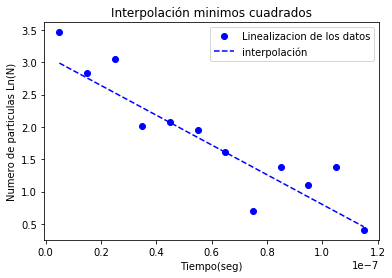

In [6]:
plt.plot(D[:,0],D[:,1],'bo')
plt.plot(x,g,'b--')
plt.title('Interpolación minimos cuadrados')
plt.ylabel('Numero de particulas Ln(N)')
plt.xlabel('Tiempo(seg)')
plt.legend(('Linealizacion de los datos','interpolación'),loc='upper right')
#plt.text(60, 2.7, r'$ \tau $ = %0.10f'%(1/(a2*(-1))), fontsize=10)

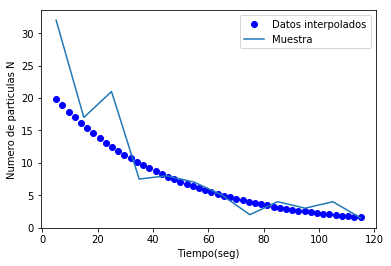

In [8]:
# N(t) = N_o exp(- \lambda t)
N = numpy.exp(a1+a2*x)
plt.plot(x/(1e-9),N,'bo')
plt.plot(Dat[:,0],Dat[:,1])
plt.ylabel('Numero de particulas N')
plt.xlabel('Tiempo(seg)')
plt.legend(('Datos interpolados','Muestra'),loc='upper right')